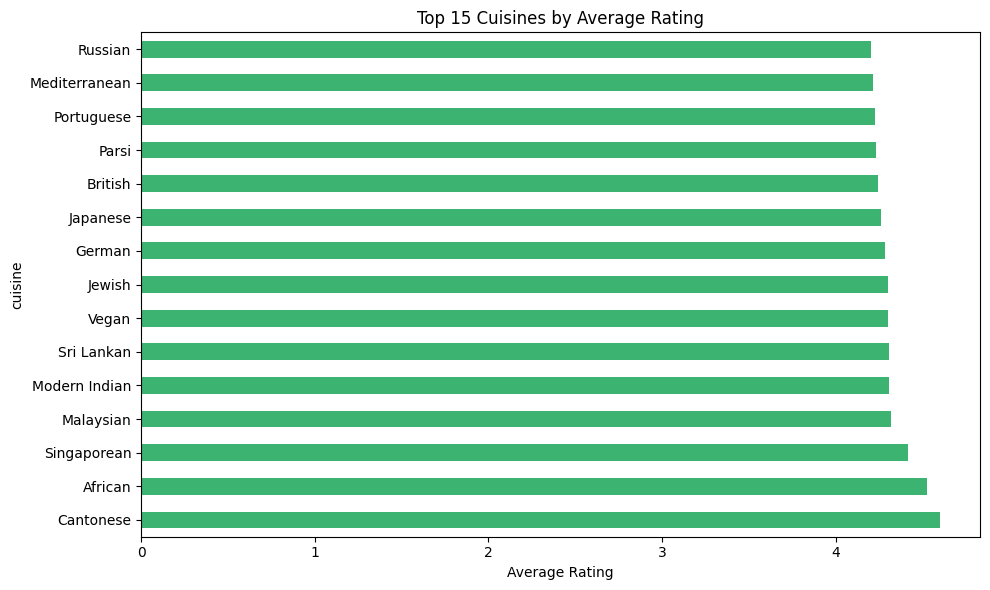

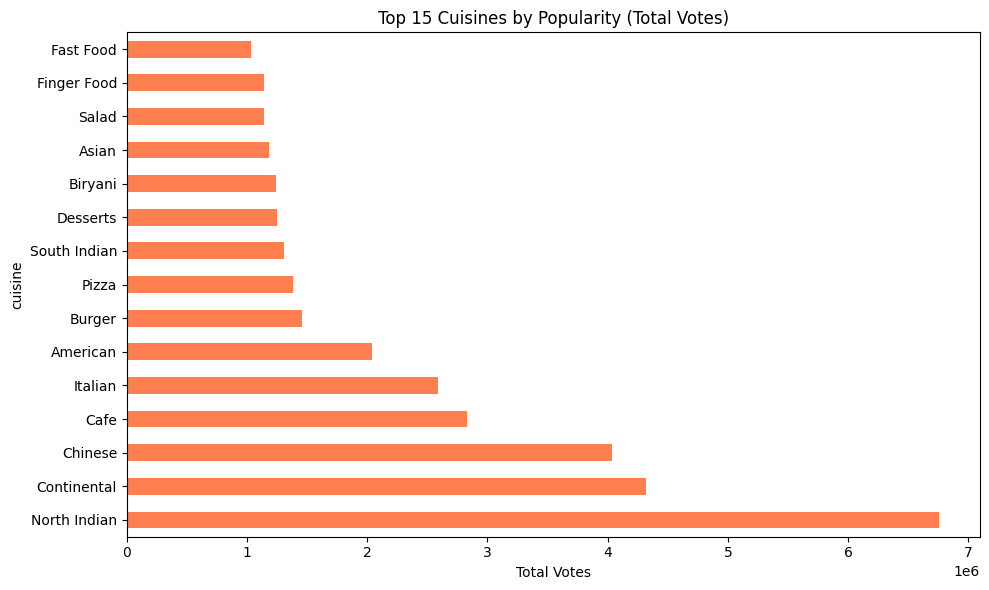

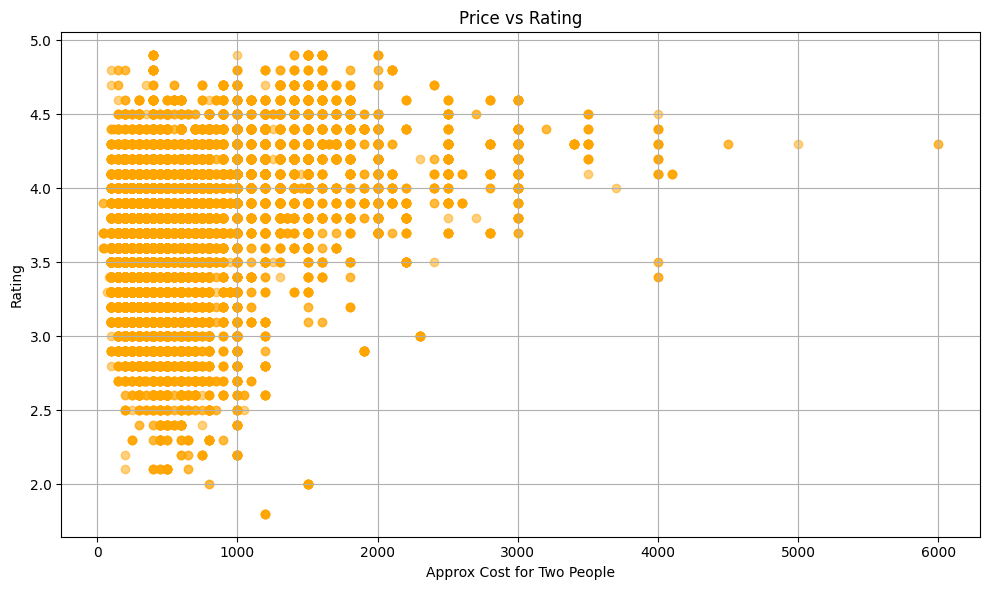

<Figure size 800x600 with 0 Axes>

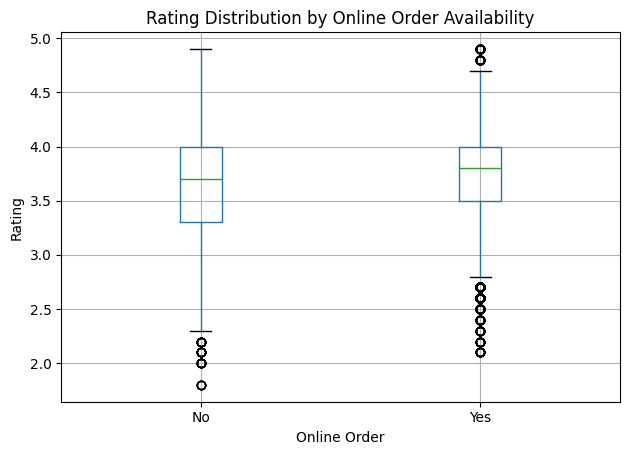


🔍 Key Insights:

1️⃣ Top Rated Cuisines (with >5 restaurants):
             avg_rating  restaurant_count
cuisine                                  
Cantonese      4.600000                 6
African        4.523529                17
Singaporean    4.414894                47 

2️⃣ Most Popular Cuisines (by votes):
              total_votes  avg_rating
cuisine                              
North Indian      6758373    3.641717
Continental       4319653    3.962046
Chinese           4035291    3.611805 

3️⃣ Cuisines with Highest Average Cost:
primary_cuisine
Spanish     2323.529412
French      2112.500000
Sushi       2000.000000
Japanese    1937.500000
Bar Food    1887.500000
Name: approx_cost(for two people), dtype: float64 

4️⃣ Average Rating by Online Order Availability:
online_order
No     3.659538
Yes    3.723796
Name: Rating, dtype: float64 

5️⃣ Top Rated Restaurants:
                              name  Rating  votes primary_cuisine
39351  Byg Brewski Brewing Company     4.9  1683

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# STEP 1: Load the Dataset
# =========================
def load_data(filepath):
    """Load Excel dataset."""
    return pd.read_excel(filepath)


# =========================
# STEP 2: Clean the Dataset
# =========================
def preprocess_data(df):
    """Clean and prepare the Zomato data for analysis."""

    # Remove duplicates and handle missing values
    df.drop_duplicates(inplace=True)
    df.fillna({'Rating': 0, 'votes': 0, 'approx_cost(for two people)': 0}, inplace=True)

    # Convert numeric columns
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
    df['approx_cost(for two people)'] = (
        df['approx_cost(for two people)']
        .astype(str)
        .str.replace(',', '', regex=False)
        .astype(float)
    )

    # Clean and standardize text columns
    if 'location' in df.columns:
        df['location'] = df['location'].astype(str).str.strip().str.title()

    if 'cuisines' in df.columns:
        df['primary_cuisine'] = df['cuisines'].astype(str).str.split(',').str[0].str.strip().str.title()

    return df


# ===================================
# STEP 3: Analyze by Cuisine Category
# ===================================
def compute_cuisine_stats(df):
    """Generate summary statistics by cuisine type."""

    if 'cuisines' not in df.columns:
        return pd.DataFrame(), df

    df_exp = df.copy()
    df_exp['cuisine'] = df_exp['cuisines'].astype(str).str.split(',')
    df_exp = df_exp.explode('cuisine')
    df_exp['cuisine'] = df_exp['cuisine'].str.strip().str.title()

    cuisine_summary = df_exp.groupby('cuisine').agg({
        'Rating': 'mean',
        'votes': 'sum',
        'approx_cost(for two people)': 'mean',
        'name': 'count'
    }).rename(columns={
        'Rating': 'avg_rating',
        'votes': 'total_votes',
        'approx_cost(for two people)': 'avg_cost',
        'name': 'restaurant_count'
    }).sort_values('avg_rating', ascending=False)

    return cuisine_summary, df_exp


# ============================
# STEP 4: Visualization Plots
# ============================
def plot_findings(cuisine_stats, df):
    """Generate plots for key findings."""

    # Top-rated cuisines
    filtered = cuisine_stats[cuisine_stats['restaurant_count'] > 5]
    top_rated = filtered.sort_values('avg_rating', ascending=False).head(15)

    top_rated['avg_rating'].plot(kind='barh', color='mediumseagreen', figsize=(10, 6))
    plt.title('Top 15 Cuisines by Average Rating')
    plt.xlabel('Average Rating')
    plt.tight_layout()
    plt.show()

    # Most popular cuisines by vote
    top_votes = cuisine_stats.sort_values('total_votes', ascending=False).head(15)
    top_votes['total_votes'].plot(kind='barh', color='coral', figsize=(10, 6))
    plt.title('Top 15 Cuisines by Popularity (Total Votes)')
    plt.xlabel('Total Votes')
    plt.tight_layout()
    plt.show()

    # Scatter plot: Price vs Rating
    plt.figure(figsize=(10, 6))
    plt.scatter(df['approx_cost(for two people)'], df['Rating'], alpha=0.5, color='orange')
    plt.title('Price vs Rating')
    plt.xlabel('Approx Cost for Two People')
    plt.ylabel('Rating')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Boxplot: Rating by online ordering
    if 'online_order' in df.columns:
        plt.figure(figsize=(8, 6))
        df.boxplot(column='Rating', by='online_order')
        plt.title('Rating Distribution by Online Order Availability')
        plt.suptitle('')
        plt.xlabel('Online Order')
        plt.ylabel('Rating')
        plt.tight_layout()
        plt.show()


# ========================
# STEP 5: Generate Insights
# ========================
def summarize_insights(cuisine_stats, df):
    """Print analytical insights based on the data."""

    print("\n🔍 Key Insights:\n")

    top_cuisines = cuisine_stats[cuisine_stats['restaurant_count'] > 5].sort_values('avg_rating', ascending=False).head(3)
    print("1️⃣ Top Rated Cuisines (with >5 restaurants):")
    print(top_cuisines[['avg_rating', 'restaurant_count']], "\n")

    most_voted = cuisine_stats.sort_values('total_votes', ascending=False).head(3)
    print("2️⃣ Most Popular Cuisines (by votes):")
    print(most_voted[['total_votes', 'avg_rating']], "\n")

    price_trends = df.groupby('primary_cuisine')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(5)
    print("3️⃣ Cuisines with Highest Average Cost:")
    print(price_trends, "\n")

    if 'online_order' in df.columns:
        online_rating = df.groupby('online_order')['Rating'].mean()
        print("4️⃣ Average Rating by Online Order Availability:")
        print(online_rating, "\n")

    best_restaurants = df.sort_values(['Rating', 'votes'], ascending=[False, False]).head(5)
    print("5️⃣ Top Rated Restaurants:")
    print(best_restaurants[['name', 'Rating', 'votes', 'primary_cuisine']])


# =====================
# MAIN EXECUTION BLOCK
# =====================
if __name__ == "__main__":
    # Step-by-step execution
    data = load_data("data.xlsx")  # Make sure the file is in your working directory
    cleaned = preprocess_data(data)
    cuisine_stats, exploded = compute_cuisine_stats(cleaned)

    plot_findings(cuisine_stats, cleaned)
    summarize_insights(cuisine_stats, cleaned)



